# Trabajo Práctico 2 - Clasificación aplicada a la EPH 

## Gil Deza, Hüppi Lo Prete, Walker 

### Parte 1 - Analizando la base 

In [20]:
# Utilizamos el código de la clase tutorial para crear un botón para ocultar el código 
#Fuente: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [19]:
# Importamos paquetes a utilizar
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pip install heatmapz

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [10]:
from heatmap import heatmap, corrplot

### Punto 2

In [11]:
# Importamos la base
df=pd.read_excel("usu_individual_T122.xls")
df


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,2,1,43,N,14,104,...,10.0,10,77500.0,9,9.0,9,NaN,9.0,10,194
1,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,3,1,43,N,14,104,...,10.0,10,77500.0,9,9.0,9,NaN,9.0,10,194
2,TQRMNOQXQHLOKQCDEGKDB00777573,2022,1,1,4,1,43,N,14,104,...,10.0,10,77500.0,9,9.0,9,NaN,9.0,10,194
3,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,1,1,1,S,33,1741,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,2,1,1,S,33,1741,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49701,TQRMNOPRPHMNMLCDEIIAD00701192,2022,1,1,2,1,1,S,32,2131,...,NaN,9,187500.0,10,NaN,10,10.0,NaN,10,5143
49702,TQRMNOSRWHKMLUCDEIIAD00780103,2022,1,1,1,1,1,S,32,1513,...,NaN,5,56100.0,8,NaN,8,8.0,NaN,5,2777
49703,TQRMNOSRWHKMLUCDEIIAD00780103,2022,1,1,2,1,1,S,32,1513,...,NaN,5,56100.0,8,NaN,8,8.0,NaN,5,2777
49704,TQRMNOQRPHMMLPCDEFIAH00707721,2022,1,1,1,1,43,S,2,678,...,NaN,6,34000.0,5,5.0,5,5.0,NaN,5,2274


#### a)

In [12]:
# Armamos un nuevo df solo con las observaciones de Buenos Aires y Gran Buenos Aires
df_ba = df.loc[df['AGLOMERADO'].isin([32, 33])]
df_ba


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
3,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,1,1,1,S,33,1741,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,2,1,1,S,33,1741,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
5,TQRMNOSUPHKKPQCDEIJAH00780151,2022,1,1,3,1,1,S,33,1741,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
75,TQRMNOPQQHKMRLCDEIJAH00780169,2022,1,1,1,1,1,S,33,456,...,NaN,0,0.0,0,NaN,0,0.0,NaN,0,647
76,TQRMNOSXRHJMTRCDEIJAH00693084,2022,1,1,1,1,1,S,33,1199,...,NaN,1,10000.0,1,NaN,1,1.0,NaN,1,1470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,TQRMNOTTSHKNLSCDEIIAD00780102,2022,1,1,2,1,1,S,32,2839,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
49700,TQRMNOPRPHMNMLCDEIIAD00701192,2022,1,1,1,1,1,S,32,2131,...,NaN,9,187500.0,10,NaN,10,10.0,NaN,10,5143
49701,TQRMNOPRPHMNMLCDEIIAD00701192,2022,1,1,2,1,1,S,32,2131,...,NaN,9,187500.0,10,NaN,10,10.0,NaN,10,5143
49702,TQRMNOSRWHKMLUCDEIIAD00780103,2022,1,1,1,1,1,S,32,1513,...,NaN,5,56100.0,8,NaN,8,8.0,NaN,5,2777


#### b)

In [14]:
#Hacemos print de las observaciones que tengan valores de ingresos totales familiares (ITF) y per cápita (IPCF) negativos.

print(df_ba[df_ba["ITF"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(df_ba[df_ba["IPCF"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(df_ba[df_ba["P21"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(df_ba[df_ba["P47T"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(df_ba[df_ba["CH06"] < 0])
#Obtenemos un dataframe con datos de edad negativos, por lo que procedemos a eliminarlos.

Empty DataFrame
Columns: [CODUSU, ANO4, TRIMESTRE, NRO_HOGAR, COMPONENTE, H15, REGION, MAS_500, AGLOMERADO, PONDERA, CH03, CH04, CH05, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH14, CH15, CH15_COD, CH16, CH16_COD, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, IMPUTA, PP02C1, PP02C2, PP02C3, PP02C4, PP02C5, PP02C6, PP02C7, PP02C8, PP02E, PP02H, PP02I, PP03C, PP03D, PP3E_TOT, PP3F_TOT, PP03G, PP03H, PP03I, PP03J, INTENSI, PP04A, PP04B_COD, PP04B1, PP04B2, PP04B3_MES, PP04B3_ANO, PP04B3_DIA, PP04C, PP04C99, PP04D_COD, PP04G, PP05B2_MES, PP05B2_ANO, PP05B2_DIA, PP05C_1, PP05C_2, PP05C_3, PP05E, PP05F, PP05H, PP06A, PP06C, PP06D, PP06E, PP06H, PP07A, PP07C, PP07D, PP07E, PP07F1, PP07F2, PP07F3, PP07F4, PP07F5, PP07G1, PP07G2, PP07G3, PP07G4, PP07G_59, PP07H, PP07I, PP07J, PP07K, PP08D1, PP08D4, PP08F1, PP08F2, PP08J1, PP08J2, ...]
Index: []

[0 rows x 177 columns]
Empty DataFrame
Columns: [CODUSU, ANO4, TRIMESTRE, NRO_HOGAR, COMPONENTE, H15, REGION, MAS_500, AGLOMERADO, PONDERA, CH03, CH04, 

In [15]:
#Eliminamos las observaciones con edades negativas.
df_ba_limpio = df_ba[df_ba.CH06>=0]

#Eliminamos las observaciones con ingreso negativo.
df_ba_limpio = df_ba_limpio[df_ba_limpio.P21>=0]

#Eliminamos las observaciones con ingreso negativo.
df_ba_limpio = df_ba_limpio[df_ba_limpio.P47T>=0]

#Chequeamos que al imprimir el dataframe seleccionando edades negativas devuelva un dataframe vacío.
print(df_ba_limpio[df_ba_limpio["CH06"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(df_ba_limpio[df_ba_limpio["P21"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(df_ba_limpio[df_ba_limpio["P47T"] < 0])

Empty DataFrame
Columns: [CODUSU, ANO4, TRIMESTRE, NRO_HOGAR, COMPONENTE, H15, REGION, MAS_500, AGLOMERADO, PONDERA, CH03, CH04, CH05, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH14, CH15, CH15_COD, CH16, CH16_COD, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, IMPUTA, PP02C1, PP02C2, PP02C3, PP02C4, PP02C5, PP02C6, PP02C7, PP02C8, PP02E, PP02H, PP02I, PP03C, PP03D, PP3E_TOT, PP3F_TOT, PP03G, PP03H, PP03I, PP03J, INTENSI, PP04A, PP04B_COD, PP04B1, PP04B2, PP04B3_MES, PP04B3_ANO, PP04B3_DIA, PP04C, PP04C99, PP04D_COD, PP04G, PP05B2_MES, PP05B2_ANO, PP05B2_DIA, PP05C_1, PP05C_2, PP05C_3, PP05E, PP05F, PP05H, PP06A, PP06C, PP06D, PP06E, PP06H, PP07A, PP07C, PP07D, PP07E, PP07F1, PP07F2, PP07F3, PP07F4, PP07F5, PP07G1, PP07G2, PP07G3, PP07G4, PP07G_59, PP07H, PP07I, PP07J, PP07K, PP08D1, PP08D4, PP08F1, PP08F2, PP08J1, PP08J2, ...]
Index: []

[0 rows x 177 columns]
Empty DataFrame
Columns: [CODUSU, ANO4, TRIMESTRE, NRO_HOGAR, COMPONENTE, H15, REGION, MAS_500, AGLOMERADO, PONDERA, CH03, CH04, 

#### c)

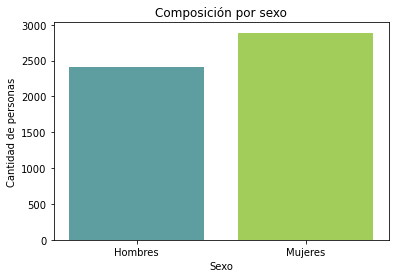

In [16]:
#Hacemos un gráfico de barras de la composición por sexo
#Armamos un diccionario con los datos
data = {"Hombres":df_ba_limpio['CH04'].value_counts()[1], "Mujeres":df_ba_limpio['CH04'].value_counts()[2]}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color = ["#5F9EA0", "#A2CD5A"])
#Definimos los títulos y ejes
plt.ylabel("Cantidad de personas")
plt.xlabel("Sexo")
plt.title("Composición por sexo")
plt.show()


#### d)

Text(0.5, 1.0, 'Heatmap de matriz de correlación')

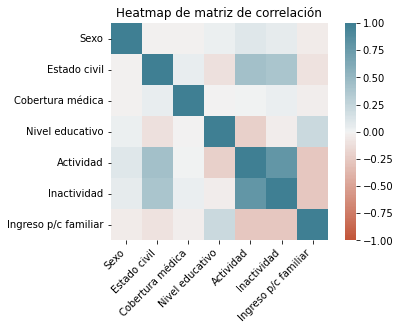

In [17]:
#Tomamos como guía el código propuesto en la consigna.
#Armamos un dataframe con las variables indicadas
data_cor = df_ba_limpio[['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
data_cor

#Armamos la matriz de correlación
corr = data_cor.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
#Cambiamos las labels
ax.set_xticklabels(
    ax.set_xticklabels(["Sexo", "Estado civil", "Cobertura médica", "Nivel educativo", "Actividad", "Inactividad", "Ingreso p/c familiar"]),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.set_yticklabels(["Sexo", "Estado civil", "Cobertura médica", "Nivel educativo", "Actividad", "Inactividad", "Ingreso p/c familiar"]),
    rotation=0,
);
#Sumamos el título
plt.title("Heatmap de matriz de correlación")

##### Interpretación
Observamos que en la diagonal principal la correlación es perfecta, dado que se trata de la correlación de la variable con si misma. Hay una correlación alta entre "actividad" e "inactividad", esto se debe a que los valores más altos de la primera variable se definen para las personas "desocupadas", "inactivas" o "menores". Esto coincide con las especificaciones de las categorías de inactividad. También hay correlación positiva, pero menor, para el "estado civil" con "actividad" e "inactividad". Similarmente sucede con el "nivel educativo" y el "nivel de ingreso familiar".

Por otra parte, podemos señalar un grupo de correlaciones cercanas a cero, estas son:
- "sexo" con todas las otras variables
- "cobertura médica" con todas las otras variables
- "nivel educativo" con "inactividad"

Por último, encontramos las siguientes correlaciones negativas bajas y moderadas:
- "estado civil" con "nivel educativo" y con "ingreso familiar"
- "nivel educativo" con "actividad"
- "actividad" e "inactividad" con "ingreso per cápita familiar"

#### e)

In [18]:
# Contamos cuántos desocupados hay en la muestra

print("En la muestra hay",df_ba_limpio['ESTADO'].value_counts()[2], "personas desocupadas")

# Contamos cuántos inactivos hay en la muestra
print("En la muestra hay",df_ba_limpio['ESTADO'].value_counts()[3], "personas inactivas")

#Calculamos la media de ingreso per cápita familiar según estado


print(df_ba_limpio.groupby(by = ["ESTADO"]).agg({"IPCF":"mean"}))

En la muestra hay 216 personas desocupadas
En la muestra hay 2421 personas inactivas
                IPCF
ESTADO              
1       47629.052862
2       15850.853519
3       24879.697447
4       18225.896480


#### Interpretación
La media del ingreso familiar per cápita para las personas ocupadas es de $47629.05

La media del ingreso familiar per cápita para las personas desocupadas es de $15850.85

La media del ingreso familiar per cápita para las personas inactivas es de $24879.70

#### f)

In [32]:
# Importamos la tabla de equivalencias 
tabla_adulto=pd.read_excel("tabla_adulto_equiv.xls", header = 4, nrows=23, )
tabla_adulto.rename({'Unnamed: 0':'Edad','Unnamed: 1':'Mujeres','Unnamed: 2':'Varones'}, axis=1, inplace = True)
tabla_adulto


,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


In [49]:
# Generamos una nueva tabla para mujeres
tabla_adulto_m = tabla_adulto[["Edad","Mujeres"]]
tabla_adulto_m

# Generamos una nueva tabla para varones
tabla_adulto_v = tabla_adulto[["Edad","Varones"]]
tabla_adulto_v

,Edad,Varones
0,Menor de 1 año,0.35
1,1año,0.37
2,2 años,0.46
3,3 años,0.51
4,4 años,0.55
5,5 años,0.60
6,6 años,0.64
7,7 años,0.66
8,8 años,0.68
9,9 años,0.69


In [55]:
# Generamos Ids para mujeres
N=0 
temp = 0
lista = []
for i in range(23):
    temp = "M" + str(N)
    lista.append(temp)
    N=N+1

print(lista)

tabla_adulto_m["id"]=lista
tabla_adulto_m["Varon"]=0
tabla_adulto_m.rename({'Mujeres':'Valor'}, axis=1, inplace = True)
tabla_adulto_m


['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22']


,Edad,Valor,id,Varon
0,Menor de 1 año,0.35,M0,0
1,1año,0.37,M1,0
2,2 años,0.46,M2,0
3,3 años,0.51,M3,0
4,4 años,0.55,M4,0
5,5 años,0.60,M5,0
6,6 años,0.64,M6,0
7,7 años,0.66,M7,0
8,8 años,0.68,M8,0
9,9 años,0.69,M9,0


In [54]:
# Generamos Ids para varones
N=0 
temp_v = 0
lista_v = []
for i in range(23):
    temp_v = "V" + str(N)
    lista_v.append(temp_v)
    N=N+1

print(lista_v)

tabla_adulto_v["id"]=lista_v
tabla_adulto_v["Varon"]=1
tabla_adulto_v.rename({'Varones':'Valor'}, axis=1, inplace = True)
tabla_adulto_v


['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']


,Edad,Valor,id,Varon
0,Menor de 1 año,0.35,V0,1
1,1año,0.37,V1,1
2,2 años,0.46,V2,1
3,3 años,0.51,V3,1
4,4 años,0.55,V4,1
5,5 años,0.60,V5,1
6,6 años,0.64,V6,1
7,7 años,0.66,V7,1
8,8 años,0.68,V8,1
9,9 años,0.69,V9,1


In [56]:
# Unimos las tablas verticalmente
tabla_adulto_total = tabla_adulto_v.append(tabla_adulto_m) 
tabla_adulto_total.reset_index(inplace=True, drop=True)
tabla_adulto_total

C:\Users\caterina\AppData\Local\Temp\ipykernel_4048\13022014.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla_adulto_total = tabla_adulto_v.append(tabla_adulto_m)


,Edad,Valor,id,Varon
0,Menor de 1 año,0.35,V0,1
1,1año,0.37,V1,1
2,2 años,0.46,V2,1
3,3 años,0.51,V3,1
4,4 años,0.55,V4,1
5,5 años,0.60,V5,1
6,6 años,0.64,V6,1
7,7 años,0.66,V7,1
8,8 años,0.68,V8,1
9,9 años,0.69,V9,1


In [98]:
for index, row in df_ba_limpio.iterrows(): 
    if row["CH06"]<1:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V0"
        else: 
            df_ba_limpio[index,"id"]="M0"
    elif row["CH06"]==1:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V1"
        else: 
            df_ba_limpio[index,"id"]="M1"
    elif row["CH06"]==2:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V2"
        else: 
            df_ba_limpio[index,"id"]="M2"
    elif row["CH06"]==3:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V3"
        else: 
            df_ba_limpio[index,"id"]="M3"
    elif row["CH06"]==4:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V4"
        else: 
            df_ba_limpio[index,"id"]="M4"
    elif row["CH06"]==5:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V5"
        else: 
            df_ba_limpio[index,"id"]="M5"
    elif row["CH06"]==6:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V6"
        else: 
            df_ba_limpio[index,"id"]="M6"
    elif row["CH06"]==7:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V7"
        else: 
            df_ba_limpio[index,"id"]="M7"
    elif row["CH06"]==8:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V8"
        else: 
            df_ba_limpio[index,"id"]="M8"
    elif row["CH06"]==9:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V9"
        else: 
            df_ba_limpio[index,"id"]="M9"
    elif row["CH06"]==10:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V10"
        else: 
            df_ba_limpio[index,"id"]="M10"
    elif row["CH06"]==11:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V11"
        else: 
            df_ba_limpio[index,"id"]="M11"
    elif row["CH06"]==12:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V12"
        else: 
            df_ba_limpio[index,"id"]="M12"
    elif row["CH06"]==13:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V13"
        else: 
            df_ba_limpio[index,"id"]="M13"
    elif row["CH06"]==14:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V14"
        else: 
            df_ba_limpio[index,"id"]="M14"
    elif row["CH06"]==15:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V15"
        else:
            df_ba_limpio[index,"id"]="M15"
    elif row["CH06"]==16:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V16"
        else: 
            df_ba_limpio[index,"id"]="M16"
    elif row["CH06"]==17:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V17"
        else: 
            df_ba_limpio[index,"id"]="M17"
    elif (row["CH06"]> 17 and row["CH06"]<30):
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V18"
        else: 
            df_ba_limpio[index,"id"]="M18"
    elif (row["CH06"]>= 30 and row["CH06"]<46):
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V19"
        else: 
            df_ba_limpio[index,"id"]="M19"
    elif (row["CH06"]>= 46 and row["CH06"]<61):
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V20"
        else: 
            df_ba_limpio[index,"id"]="M20"
    elif (row["CH06"]>= 61 and row["CH06"]<75):
        if row["CH04"]==1:
            df_ba_limpio[CH06,"id"]="V21"
        else: 
            df_ba_limpio[index,"id"]="M21"
    else:
        if row["CH04"]==1:
            df_ba_limpio[index,"id"]="V22"
        else: 
            df_ba_limpio[index,"id"]="M22"
df_ba_limpio

IndexError: index 5301 is out of bounds for axis 0 with size 5301

In [76]:
df_ba_limpio[["CH04","CH06","id"]] 

,CH04,CH06,id
4,1,68,M21
75,1,69,M21
76,2,47,M21
77,2,18,M21
78,2,52,M21
...,...,...,...
49697,1,78,M21
49700,1,64,M21
49701,2,68,M21
49702,1,70,M21
